<a href="https://colab.research.google.com/github/alepenaa94/TP1_Real_or_Not/blob/master/TP1_Real_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRÁCTICO 1: Análisis Exploratorio de Datos

## Análisis realizado
- [Tratamiento de datos](#link_1)
- [Análisis de location](#link_2)
- [Análisis de la cantidad de palabras de los tweets](#link_3)
- [Análisis de la longitud de los tweets](#link_4)
- [Covarianza y Correlación](#link_5)
- [Análisis de keywords](#link_6)
- [Análisis de menciones](#link_7)
- [Análisis de "tweets expresivos"](#link_8)
- [Análisis de registros en donde el text no contenga la keyword](#link_9)
- [Análisis de hashtags](#link_10)
- [Análisis de ubicación según target](#link_11)
- [Análisis de tweets terroristas](#link_12)
- [Análisis de links](#link_13)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 10)
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
train_df = pd.read_csv('./Data/train.csv', encoding='latin-1',dtype={'id': np.uint16,'target': np.bool})

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True


Para dar un primer vistazo a la información con la que vamos trabajar, veamos rápidamente cómo está distribuída la cantidad de tweets según si son verdaderos o falsos.

Text(0, 0.5, 'Cantidad de tweets')

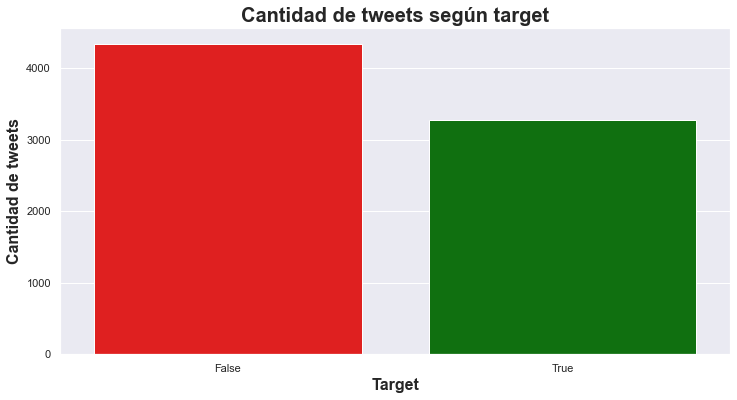

In [4]:
plt.figure(figsize=(12,6))

ax = sns.countplot(x= 'target',data = train_df,palette=['red','green']);

plt.title('Cantidad de tweets según target', fontsize=20,weight='bold')
ax.set_xlabel('Target', fontsize=16, fontweight='bold')
ax.set_ylabel('Cantidad de tweets', fontsize=16, fontweight='bold')

## Tratamiento de datos<a id='link_1'></a>

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null uint16
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null bool
dtypes: bool(1), object(3), uint16(1)
memory usage: 200.9+ KB


Podemos observar que las columnas **"keyword"** y **"location"** poseen algunos valores nulos, vamos a analizar cada caso particular para determinar como vamos a proceder con los análisis.

In [6]:
train_df['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

El campo **keyword** tiene **61 registros** con valores nulos. Como es una cantidad pequeña en relación a la cantidad total de registros (**7613 registros**), para los análisis vamos a considerar descartar los registros nulos.

Veamos que tipo de valores contiene este campo.

In [7]:
train_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
train_df.loc[~train_df['keyword'].isnull() & train_df['keyword'].str.contains('%20')]['keyword'].value_counts()

body%20bags              41
oil%20spill              38
burning%20buildings      37
cliff%20fall             36
dust%20storm             36
nuclear%20reactor        36
structural%20failure     35
suicide%20bomb           35
emergency%20plan         35
bridge%20collapse        35
buildings%20burning      35
airplane%20accident      35
nuclear%20disaster       34
heat%20wave              34
loud%20bang              34
natural%20disaster       34
violent%20storm          33
buildings%20on%20fire    33
blew%20up                33
chemical%20emergency     33
body%20bagging           33
fire%20truck             33
body%20bag               33
blown%20up               33
mass%20murder            33
emergency%20services     33
suicide%20bombing        33
mass%20murderer          32
forest%20fires           32
suicide%20bomber         31
wild%20fires             31
first%20responders       29
bush%20fires             25
war%20zone               24
forest%20fire            19
radiation%20emergenc

Observamos que en algunos keyword aparece "%20" en donde va un espacio; vamos a limpiar esto para mayor claridad en la información.

In [9]:
train_df['keyword'] = train_df['keyword'].str.replace('%20',' ')

Posiblemente luego analicemos los textos y veamos la posibilidad de completar estos keyword nulos con algun valor mas significativo.

## Análisis de location<a id='link_2'></a>

In [10]:
train_df['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [11]:
train_df['location'].sample(30)

5120                  USA, North Dakota
2241                           Frascati
3147                           New York
6837                                NaN
2761                     Washington, DC
2467                                NaN
1271                 Port Charlotte, FL
6244        Deployed in the Middle East
6964               but i love kaylen ??
1964                             Geneva
103                                 304
30                                  NaN
6803                  Noida, NCR, India
2479                     United Kingdom
1968                  Beside Basketball
6662                front row at a show
5124               Eaubonne, 95, France
1752    Vancouver, Colombie-Britannique
4188                               NIFC
4057                                NaN
3523                        Philippines
4141                                NaN
4643                      Sunnyvale, CA
654                  Raleigh Durham, NC
2251                                NaN


Se observa que la ubicacion ingresada no es siempre algo coherente. Veamos las ubicaciónes no nulas con mayor cantidad de tweets.

In [12]:
locations_count = train_df['location'].value_counts()
locations_count

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Harbour Heights, FL      1
Horsemind, MI            1
CCH                      1
God is Love.             1
Welt                     1
Name: location, Length: 3341, dtype: int64

Text(0, 0.5, 'Cantidad de Tweets')

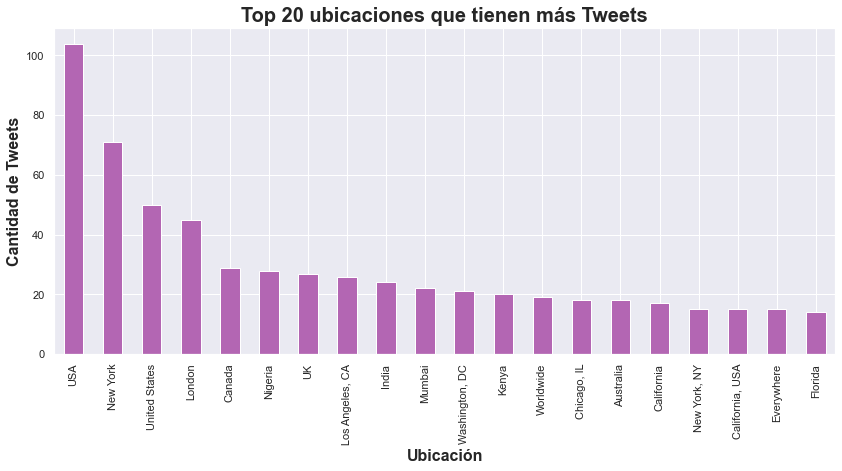

In [13]:
plot = train_df['location'].value_counts()[0:20].plot(kind='bar',figsize=(14,6), color=(0.7,0.4,0.7))

plot.set_title('Top 20 ubicaciones que tienen más Tweets', fontsize=20,weight='bold');
plot.set_xlabel('Ubicación', fontsize=16,weight='bold')
plot.set_ylabel('Cantidad de Tweets', fontsize=16,weight='bold')

Veamos las ubicaciones que tienen un único tweet.

In [14]:
location_with_one_tweet = locations_count[locations_count == 1]
location_with_one_tweet.sample(15)

Calgary,AB, Canada                               1
Lahti, Finland                                   1
Dallas, Texas.                                   1
Scituate, MA                                     1
SF Bay Area, California / Greater Phoenix, AZ    1
Third rock from the Sun                          1
Central Florida                                  1
London, Greater London, UK                       1
Benton City, Washington                          1
//??//                                           1
Narnia, Maryland                                 1
Mysore, Karnataka                                1
Davao City                                       1
Newport, Wales, UK                               1
New York ? ATL                                   1
Name: location, dtype: int64

In [15]:
print("Ubicaciones con un único tweet:",location_with_one_tweet.count());
print("Ubicaciones diferentes:",len(train_df['location'].unique()))
print("Porcentaje de ubicaciones que solo aparecen 1 vez:",location_with_one_tweet.count()/len(train_df['location'].unique())*100)

Ubicaciones con un único tweet: 2818
Ubicaciones diferentes: 3342
Porcentaje de ubicaciones que solo aparecen 1 vez: 84.32076600837821


Aproximadamente el 84,3% de las ubicaciones tienen un sólo tweet. ¿Cuántas de esas corresponden a tweets falsos?

In [16]:
# Agrupo y filtro para quedarme con los q tienen 1 tweet
tweets_one_location = train_df.groupby("location").filter(lambda x: len(x) == 1)
tweets_one_location.head()

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,True
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,False
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,False


In [17]:
tweets_one_location['target'].value_counts()

False    1716
True     1102
Name: target, dtype: int64

Vemos que aproximadamente, de estos tweets, el 60,9% resultan ser falsos.

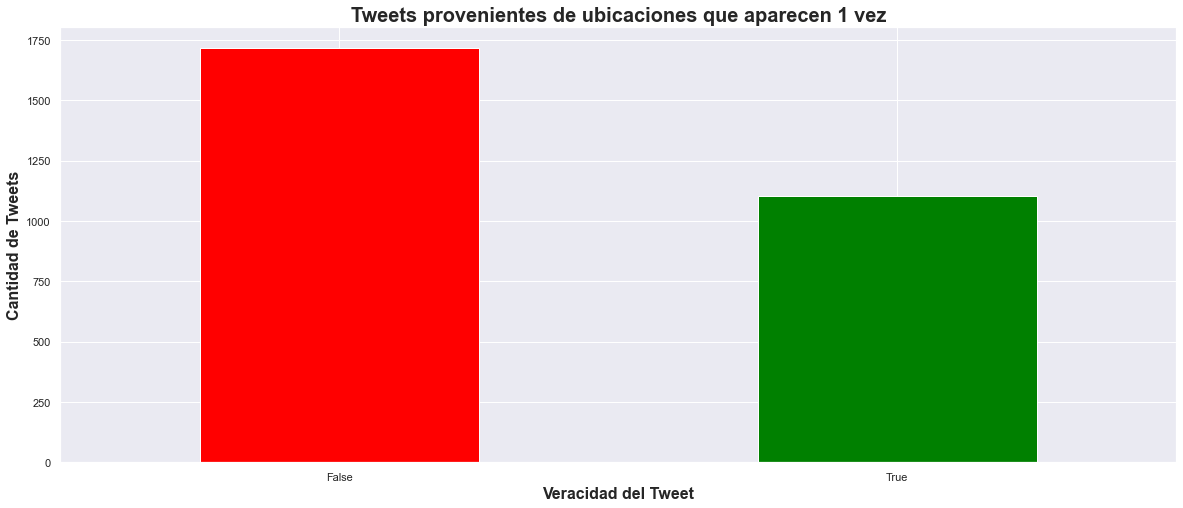

In [18]:
tweets_one_location['target'].value_counts().plot.bar(figsize=(20,8), color=('red','green'));
plt.xticks(rotation=0)

plt.title('Tweets provenientes de ubicaciones que aparecen 1 vez', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold');
plt.xlabel('Veracidad del Tweet', fontsize=16,weight='bold');

In [19]:
train_df['target'].value_counts()

False    4342
True     3271
Name: target, dtype: int64

En relacion a todos los registros, representa el 39.5% de los tweets falsos, y casi 33.7% de los verdaderos.

## Análisis de la cantidad de palabras de los tweets<a id='link_3'></a>

In [20]:
train_df['word_count'] = train_df['text'].str.count(' ') + 1
train_df['not_target'] = 0
train_df.loc[train_df['target']==0,'not_target'] = 1

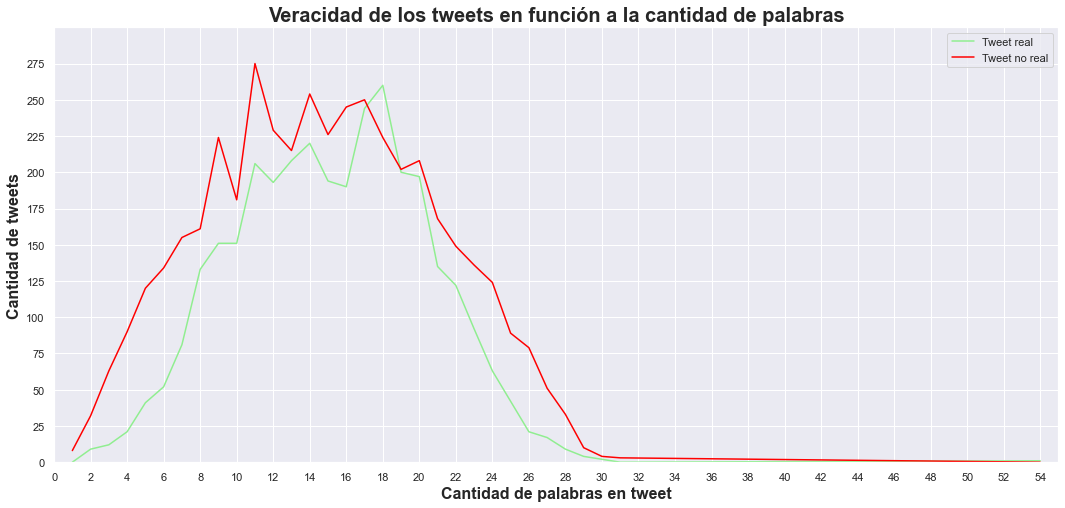

In [21]:
df = train_df.groupby('word_count').agg({'target':'sum','not_target':'sum'}).reset_index()

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='word_count',y='target',data=df,color="lightgreen", label='Tweet real')
ax = sns.lineplot(x='word_count',y='not_target',data=df,color="red", label='Tweet no real')

ax.set_ylim(0,300)
ax.set_yticks(range(0,300,25))
ax.set_xlim(0,55)
ax.set_xticks(range(0,55,2))

ax.set_title('Veracidad de los tweets en función a la cantidad de palabras', fontsize=20,weight='bold')
ax.set_xlabel('Cantidad de palabras en tweet',fontsize=16,weight='bold')
ax.set_ylabel('Cantidad de tweets', fontsize=16,weight='bold');

## Análisis de la longitud de los tweets<a id='link_4'></a>

In [22]:
train_df['longitud_del_tweet'] = train_df['text'].str.len()

Analizamos las estadísticas de la longitud en los tweets verdaderos.

In [23]:
train_df[train_df['target']]['longitud_del_tweet'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
longitud_del_tweet,3271.0,108.444207,29.511567,14.0,88.0,115.0,136.0,161.0


Analizamos las estadísticas de la longitud en los tweets falsos.

In [24]:
train_df[~train_df['target']]['longitud_del_tweet'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
longitud_del_tweet,4342.0,95.981345,36.100118,7.0,68.0,101.0,130.0,163.0


In [25]:
train_df = train_df.astype({'longitud_del_tweet':np.uint8})

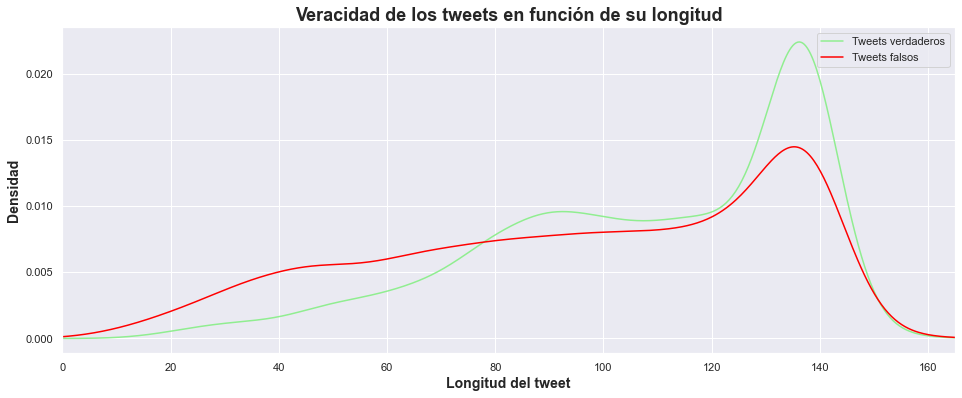

In [26]:
fig= plt.figure()
ax = fig.add_subplot(111)

plt.title('Veracidad de los tweets en función de su longitud',fontsize=18,fontweight='bold')

train_df[train_df['target']]['longitud_del_tweet'].plot.kde(color='lightgreen', figsize=(16, 6), label = 'Tweets verdaderos')
train_df[~train_df['target']]['longitud_del_tweet'].plot.kde(color='red', ax=ax, figsize=(16, 6), label = 'Tweets falsos')

ax.set_xlabel('Longitud del tweet', fontsize=14, fontweight='bold')
ax.set_ylabel('Densidad', fontsize=14, fontweight='bold')

ax.set_xlim(0, 165) #Seteamos los límites del eje x conociendo el valor máximo y mínimo de la longitud de los tweets.
ax.legend()

plt.show()

En está visualización podemos observar que los tweets que tienen una longitud menor a 80 caracteres son en su mayoría falsos, mientras que los que tienen una longitud superior tienden a ser verdaderos. Tambíen podemos ver que la longitud de los tweets tiene un pico llegando a los 140 caracteres, lo cuál tiene sentido considerando las limitaciones que la plataforma solía tener respecto a la longitud de los mismos.

## Covarianza y Correlación<a id='link_5'></a>

In [27]:
train_df['longitud_del_tweet'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
longitud_del_tweet,7613.0,101.336136,33.991338,7.0,78.0,107.0,134.0,163.0


Vamos a analizar más en detalle que va sucediendo a medida que la longitud crece; que sucede con el target, es "más real" o no el tweet?<br>
Creamos unas categorías segun lo visto anteriormente donde de todas las longitudes el 25% promedio esta en 78, el 50% en 107 y así... la idea de estas categorías es agrupar rangos entre 0 a 25 , 25 a 50 , 50 a 75 y 75 a 100 segun estas medidas obtenidas.

In [28]:
train_df.loc[train_df['longitud_del_tweet']<78.0,'Categ']="0 a 25"
train_df.loc[train_df['longitud_del_tweet']>=78.0,'Categ']="25 a 50"
train_df.loc[train_df['longitud_del_tweet']>=107.0,'Categ']= "50 a 75"
train_df.loc[train_df['longitud_del_tweet']>=134.0,'Categ']= "75 a 100"

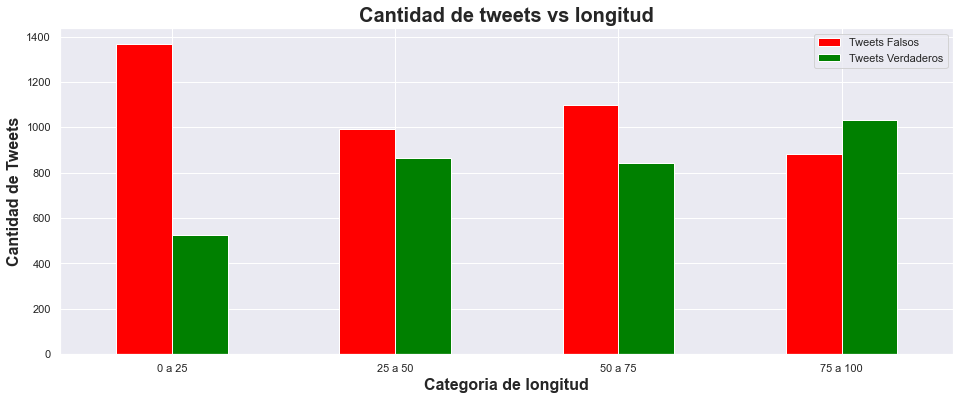

In [29]:
df_aux = train_df.groupby(['Categ','target'])['id'].count().unstack()
df_aux.columns = ['Tweets Falsos','Tweets Verdaderos']
df_aux.plot.bar(figsize=(16,6), color=('red','green'));
plt.xticks(rotation=0)

plt.title('Cantidad de tweets vs longitud', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold');
plt.xlabel('Categoria de longitud', fontsize=16,weight='bold');

Aca podemos ver que a una longitud menor es más probable que sea un tweet falso y que cuanto más largo sea el tweet mayor su probabilidad de ser real.
<br>
La idea ahora es analizar cual es la covarianza y correlacion entre estas categorias creadas en base a su longitud (como largo de la cadena) vs target.

In [30]:
df_aux = train_df
df_aux['Categ_A'] = np.where(df_aux['Categ']=="0 a 25",1,0)
df_aux['Categ_B'] = np.where(df_aux['Categ']=="25 a 50",1,0)
df_aux['Categ_C'] = np.where(df_aux['Categ']=="50 a 75",1,0)
df_aux['Categ_D'] = np.where(df_aux['Categ']=="75 a 100",1,0)

In [31]:
df_aux[['Categ_A','Categ_B','Categ_C','Categ_D','longitud_del_tweet','target']].corr()

,Categ_A,Categ_B,Categ_C,Categ_D,longitud_del_tweet,target
Categ_A,1.000000,-0.327100,-0.337233,-0.333972,-0.820184,-0.176486
Categ_B,-0.327100,1.000000,-0.332614,-0.329397,-0.154991,0.042091
Categ_C,-0.337233,-0.332614,1.000000,-0.339601,0.337340,0.005319
Categ_D,-0.333972,-0.329397,-0.339601,1.000000,0.631737,0.128873
longitud_del_tweet,-0.820184,-0.154991,0.337340,0.631737,1.000000,0.181513
target,-0.176486,0.042091,0.005319,0.128873,0.181513,1.000000


Podemos ver como aumenta la correlacion un poco a medida que la logitud aumenta, pero esto no nos indica si aumenta segun si es o no real.

## Análisis de keywords<a id='link_6'></a>

In [32]:
keywords_verdaderos = train_df.loc[~train_df['keyword'].isnull() & train_df['target']]['keyword']
keywords_verdaderos.value_counts()

wreckage       39
outbreak       39
derailment     39
oil spill      37
typhoon        37
               ..
electrocute     1
epicentre       1
body bags       1
blazing         1
ruin            1
Name: keyword, Length: 220, dtype: int64

In [33]:
keywords_falsos = train_df.loc[~train_df['keyword'].isnull() & ~train_df['target']]['keyword']
keywords_falsos.value_counts()

body bags          40
armageddon         37
harm               37
wrecked            36
ruin               36
                   ..
suicide bomber      1
suicide bombing     1
outbreak            1
oil spill           1
typhoon             1
Name: keyword, Length: 218, dtype: int64

In [34]:
df1 = keywords_verdaderos.value_counts().to_frame().reset_index()
df1.columns = ['keyword','count']

df2 = keywords_falsos.value_counts().to_frame().reset_index()
df2.columns = ['keyword','count']

merge_keywords = pd.merge(df1,df2,how='outer',on='keyword')
merge_keywords.head()

,keyword,count_x,count_y
0,wreckage,39.0,NaN
1,outbreak,39.0,1.0
2,derailment,39.0,NaN
3,oil spill,37.0,1.0
4,typhoon,37.0,1.0


In [35]:
merge_keywords.fillna(value=0,inplace=True)

In [36]:
merge_keywords.rename(columns={'count_x':'cantidad_verdaderos','count_y':'cantidad_falsos'},inplace=True)

In [37]:
merge_keywords.head()

,keyword,cantidad_verdaderos,cantidad_falsos
0,wreckage,39.0,0.0
1,outbreak,39.0,1.0
2,derailment,39.0,0.0
3,oil spill,37.0,1.0
4,typhoon,37.0,1.0


In [38]:
merge_keywords['porcentaje_verdaderos'] = (merge_keywords['cantidad_verdaderos'] / (merge_keywords['cantidad_verdaderos'] + merge_keywords['cantidad_falsos'])) * 100

In [39]:
merge_keywords.set_index('keyword',inplace=True)

In [40]:
merge_keywords.head()

,cantidad_verdaderos,cantidad_falsos,porcentaje_verdaderos
keyword,,,
wreckage,39.0,0.0,100.000000
outbreak,39.0,1.0,97.500000
derailment,39.0,0.0,100.000000
oil spill,37.0,1.0,97.368421
typhoon,37.0,1.0,97.368421


Vamos a analizar los keyword en función del porcentaje de tweets verdaderos. Para ello, vamos a considerar como significativos los keywords que tengan por lo menos 30 tweets.

In [41]:
merge_keywords.loc[(merge_keywords['cantidad_verdaderos'] + merge_keywords['cantidad_falsos']) > 30].nlargest(10,'porcentaje_verdaderos')[['cantidad_verdaderos','cantidad_falsos']]

,cantidad_verdaderos,cantidad_falsos
keyword,,
wreckage,39.0,0.0
derailment,39.0,0.0
debris,37.0,0.0
outbreak,39.0,1.0
oil spill,37.0,1.0
typhoon,37.0,1.0
suicide bombing,32.0,1.0
suicide bomber,30.0,1.0
rescuers,32.0,3.0


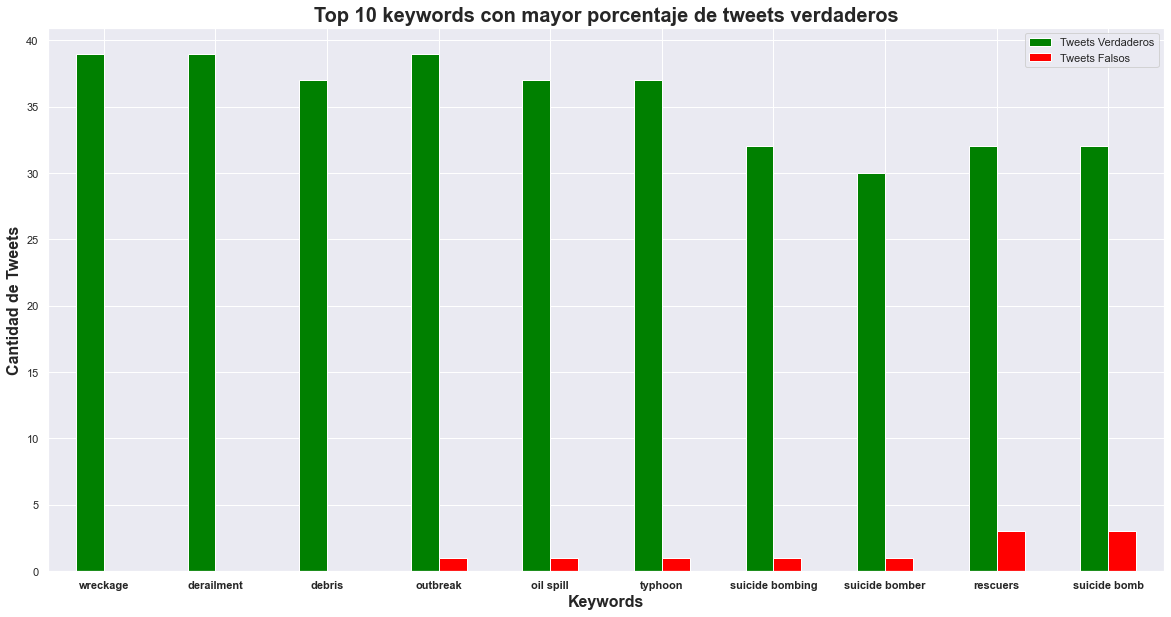

In [42]:
df_aux = merge_keywords.loc[(merge_keywords['cantidad_verdaderos'] + merge_keywords['cantidad_falsos']) > 30].nlargest(10,'porcentaje_verdaderos')[['cantidad_verdaderos','cantidad_falsos']]

df_aux.columns = ['Tweets Verdaderos','Tweets Falsos']

df_aux.plot.bar(figsize=(20,10),color=('green','red'));

plt.xticks(rotation=0,weight='bold')

plt.title('Top 10 keywords con mayor porcentaje de tweets verdaderos', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold')
plt.xlabel('Keywords', fontsize=16,weight='bold');

Hacer algun comentario...

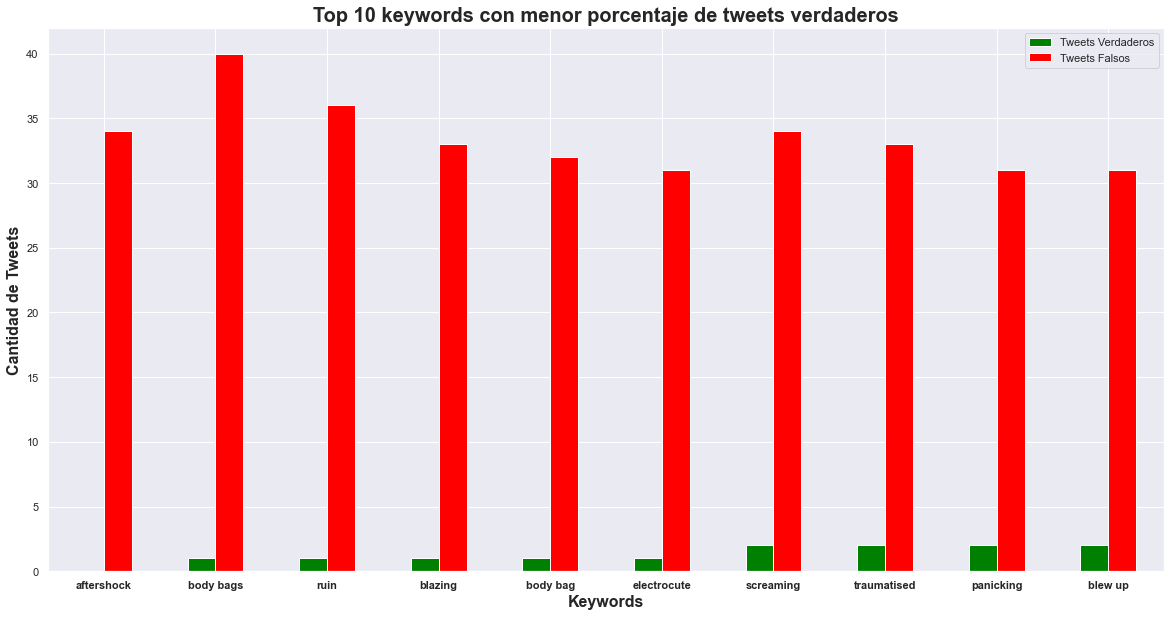

In [43]:
df_aux = merge_keywords.loc[(merge_keywords['cantidad_verdaderos'] + merge_keywords['cantidad_falsos']) > 30].nsmallest(10,'porcentaje_verdaderos')[['cantidad_verdaderos','cantidad_falsos']]

df_aux.columns = ['Tweets Verdaderos','Tweets Falsos']

df_aux.plot.bar(figsize=(20,10),color=('green','red'));

plt.xticks(rotation=0,weight='bold')

plt.title('Top 10 keywords con menor porcentaje de tweets verdaderos', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold')
plt.xlabel('Keywords', fontsize=16,weight='bold');

Hacer algun comentario...

## Análisis de menciones<a id='link_7'></a>

Vamos a analizar la naturaleza de los tweets en base a si se realiza alguna mención en el mismo o no.

In [44]:
train_df['tiene_menciones'] = train_df['text'].str.contains('@')

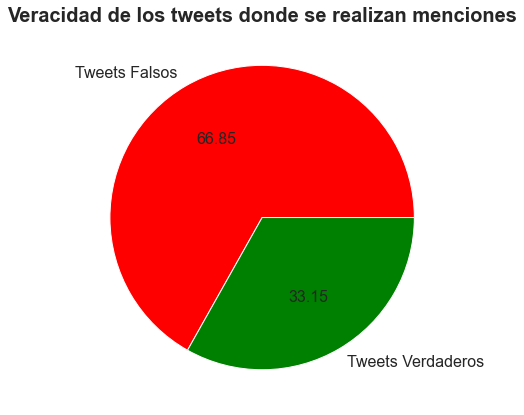

In [45]:
train_df.loc[train_df['tiene_menciones']]['target'].value_counts().plot.pie(labels=['Tweets Falsos','Tweets Verdaderos'],\
                                                figsize=(7,7),autopct='%.2f', fontsize=16,colors=('red','green'))

plt.ylabel('');
plt.title('Veracidad de los tweets donde se realizan menciones',fontsize=20,weight='bold');

Podemos ver que en 2/3 de los tweets en donde se realiza alguna mención, el tweet resulta ser falso.

## Análisis de "tweets expresivos"<a id='link_8'></a>

Consideramos como "tweet expresivo" a los tweets en donde se utiliza múltiples signos de exclamación o interrogación consecutivos.

In [46]:
train_df['es_expresivo'] = (train_df['text'].str.contains('\!\!') | train_df['text'].str.contains('\?\?'))

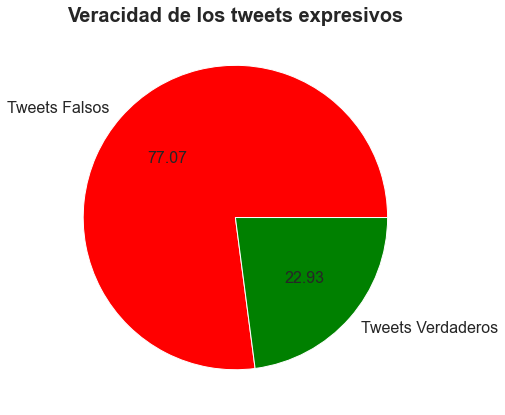

In [47]:
train_df.loc[train_df['es_expresivo']]['target'].value_counts().plot.pie(labels=['Tweets Falsos','Tweets Verdaderos'],\
                                                figsize=(7, 7),autopct='%.2f', fontsize=16,colors=('red','green'))

plt.ylabel('');
plt.title('Veracidad de los tweets expresivos',fontsize=20,weight='bold');

Como podría esperarse, los tweets en donde se utilizan signos de puntuación de manera exagerada, en general para resaltar una emoción del usuario, no suelen ser sobre noticias reales.

## Hay algún registro que el <i><b>text</b></i> NO contenga la <i><b>keyword</b></i>?<a id='link_9'></a>

In [48]:
def f_aux(row):
  if str(row['keyword']).lower() in str(row['text']).lower():
    return True
  return False

train_df['contiene_key'] = train_df.loc[~train_df['keyword'].isnull()].apply(f_aux,axis=1)

In [49]:
train_df['contiene_key'].value_counts()

True     6700
False     852
Name: contiene_key, dtype: int64

In [50]:
train_df.loc[train_df['contiene_key']==False].head(10)[['keyword','text']]

,keyword,text
32,ablaze,We always try to bring the heavy. #metal #RT h...
40,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...
45,ablaze,I gained 3 followers in the last week. You? Kn...
48,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...
49,ablaze,First night with retainers in. It's quite weir...
52,ablaze,SANTA CRUZ ÂÃÃ Head of the St Elizabeth Pol...
54,ablaze,Noches El-Bestia '@Alexis_Sanchez: happy to se...
83,accident,#TruckCrash Overturns On #FortWorth Interstate...
103,aftershock,'The man who can drive himself further once th...
105,aftershock,'There is no victory at bargain basement price...


In [51]:
train_df.loc[train_df['contiene_key']==False]['target'].value_counts()

False    500
True     352
Name: target, dtype: int64

Podemos observar que de todos los datos que tienen keyword válido, <b>6700</b> 
son los que contienen exactamente la palabra. Los otros <b>852</b> son interpretaciones del tweet o ruido. No se considera que vale la pena quitar 852 registros por la posibilidad de que la mayoria sean o no ruido.

## Análisis de hashtags<a id='link_10'></a>

Armamos un array con los hashtag que contenga el tweet.

In [52]:
train_df['cantidad_de_hashtags'] = train_df['text'].str.count('#')

In [53]:
import re
def split_hashtag(hashtag):
    return re.findall(r"#(\w+)",hashtag)

train_df['hashtags'] = train_df['text'].apply(split_hashtag)

In [54]:
train_df['cantidad_de_hashtags'].value_counts()

0     5852
1      964
2      405
3      208
4       83
5       41
6       26
10      10
7        8
8        8
13       4
11       2
9        2
Name: cantidad_de_hashtags, dtype: int64

In [55]:
df = train_df[['hashtags']].explode('hashtags').dropna()
top20_hashtags = df['hashtags'].value_counts().head(40).to_list()

top20_hashtags = [str(hashtag).lower() for hashtag in top20_hashtags]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FF633NG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FF633NG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FF633NG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


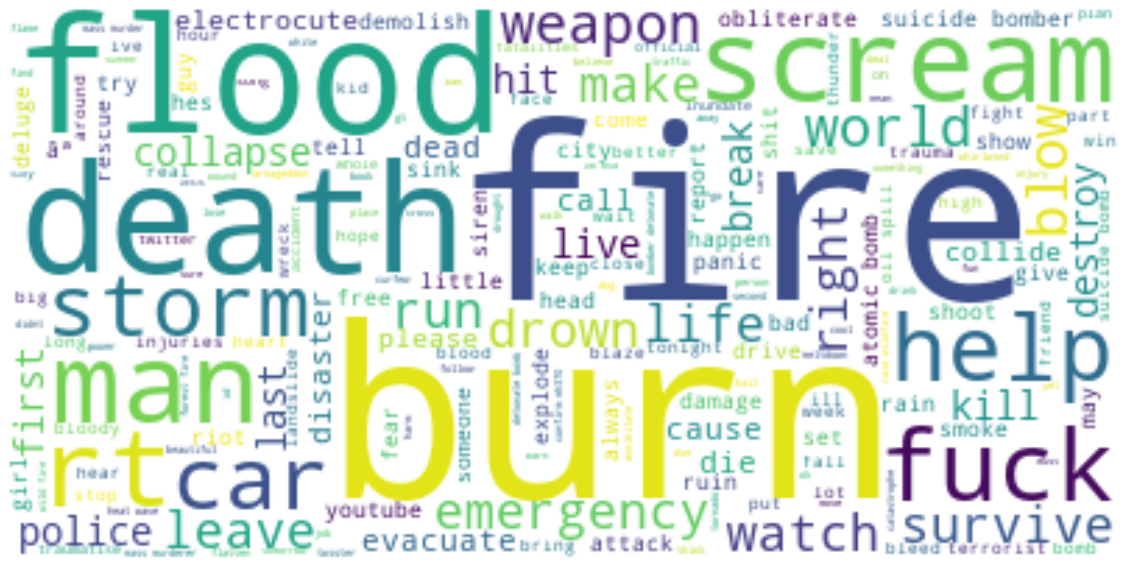

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

df=train_df.copy()

#vamos a limpiar un poco el tweet
pattern_exclude = '(one|dont|cant|would|im|people|go|make|time|love|amp|get|house|update|talk'+\
                  '|want|today|know|say|us|day|crush|see|back|think|look|rigth|remember'+\
                  '|thing|let|still|lol|much|thank|take|way|youre|road|another|really'+\
                  '|play|even|theres|everyone|feel|year|work|check|two|great|ing|like'+\
                  '|every|build|youtuve|video|n|home|body|bag|photo|stay|game|start'+\
                  '|best|well|california|end)+'

def filter_words(tweet):
    tweet = re.sub(r'(\b[\w]+:\/\/[\w -\?&;#~=\.\/@]+[\w\/])', ' ', tweet)
    tweet = re.sub(r'\'', '', tweet)
    return re.sub(r'[www.]*[A-z]+.(com|gov|edu|net|mil|org|io|int)+', ' ', tweet)

def text_to_blob(tweet):
    tweet_blob = TextBlob(str(tweet))
    return ' '.join(tweet_blob.words)


def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            word_aux = word.lower().strip()
            if re.match(pattern_exclude,
                        word_aux):
                continue
            normalized_text = lem.lemmatize(word_aux,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet

def clean(tweet):
    tweet_list = [word for word in (text_to_blob(filter_words(tweet))).split()]
    clean_tokens = [tkn for tkn in tweet_list if re.match(r'[A-z]+', tkn)]
    clean_s = ' '.join(clean_tokens)
    l_aux = normalization(clean_s.split())
    return ' '.join([word for word in l_aux if word not in stopwords.words('english')])

df['clean_text'] = df['text'].apply(clean)

text = df['clean_text'].str.split(' ').to_frame().explode('clean_text')['clean_text'].str.cat(sep=' ').lower()

wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Buscar una conclusion sobre las palabras que mayormente se usan y cuales de estos se pueden categorizar como "criticos" para decir si es tweet real o no
<br>
<br>
Podemos ver algunas palabras que podrian resultar impotantes como:
* FIRE
* POLICE
* WEAPON
* EMERGENCY
* HELP
* DEAD
* DAMAGE
* SMOKE
* SUICIDE
* BOMBER
* ATTACK
* FEAR
* CAUSE
* MILITARY
<br>
<br>

Hacemos uso de lo que sería una normalizacion de palabras para poder "agrupar" de mejor forma, por ejemplo
* rocks : rock
* corpora : corpus
* better : good


<br>
<br>

Podemos ver la posibilidad de categorizar estos y ver si tienen alguna relacion con la veracidad del tweet

In [57]:
def f_aux(hashtags):
    for hashtag in hashtags:
        if str(hashtag).lower() in ['fire','police','weapon','emergency','help','dead','damage','smoke',
              'suicide','bomber','military','attack','blood','accident','fear','cause']:
            return True
    return False
train_df['hashtag_importante'] = train_df['hashtags'].apply(f_aux)

In [58]:
train_df.loc[train_df['hashtag_importante']==True]['target'].value_counts()

False    11
True     10
Name: target, dtype: int64

No encontramos nada con hashtags y estas palabras, pero veamos los textos que contengan estas que sucede

In [59]:
def f_aux(texto):
    for w in ['fire','police','weapon','emergency','help','dead','damage','smoke',
              'suicide','bomber','military','attack','blood','accident','fear','cause']:
        if w in str(texto).lower():
            return True
    return False

train_df['texto_importante'] = train_df['text'].apply(f_aux)

In [60]:
train_df.loc[train_df['texto_importante']==True]['target'].value_counts()

True     1006
False     718
Name: target, dtype: int64

In [61]:
train_df.shape

(7613, 20)

Igualmente como vimos al inicio, <b>5852</b> de los tweets no tienen hashtag, lo que nos deja el set bastante reducido a <b>1761</b>

Nos queda analizar las que se marcan como más usadas en los tweets por mas que no describan alguna accion muy importante ...

Veamos puntualmente estas palabras que se remarcan en el gráfico que sucede.

In [62]:
df['clean_text'].str.split().to_frame().explode('clean_text')['clean_text'].value_counts(ascending=False).head(15)

fire         354
bomb         228
burn         180
kill         168
flood        164
emergency    152
disaster     152
crash        150
attack       149
police       137
train        127
storm        125
watch        118
live         114
suicide      114
Name: clean_text, dtype: int64

Cuantas de estas son keyword ? que sucede con estas palabras y el target?

Text(0, 0.5, 'Cantidad de tweets')

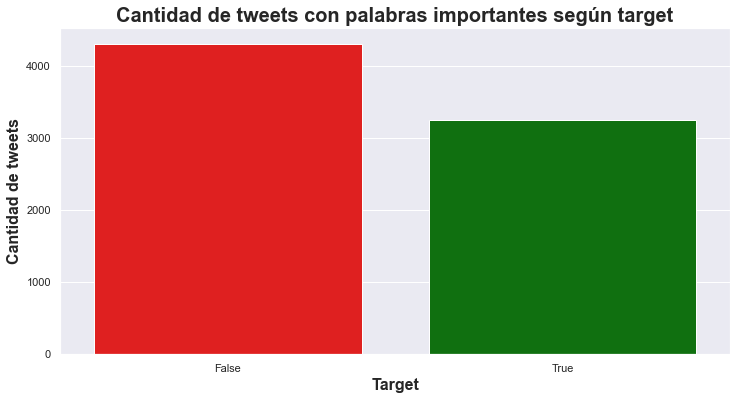

In [63]:
important_words = df['clean_text'].str.split().to_frame().explode('clean_text')['clean_text'].value_counts(ascending=False)
important_words = important_words.reset_index()['index'].to_list()

def f_aux(tweet):
    for word in important_words:
        if word in tweet:
            return True
    return False

df['important_word_match'] = df['clean_text'].apply(f_aux)
df_aux = df.loc[df['important_word_match']==True]

plt.figure(figsize=(12,6))

ax = sns.countplot(x= 'target',data = df_aux,palette=['red','green']);

plt.title('Cantidad de tweets con palabras importantes según target', fontsize=20,weight='bold')
ax.set_xlabel('Target', fontsize=16, fontweight='bold')
ax.set_ylabel('Cantidad de tweets', fontsize=16, fontweight='bold')

Esto con todas las palabras filtradas no nos sirve de mucho, veamos con el top15 que sucede

Text(0, 0.5, 'Cantidad de tweets')

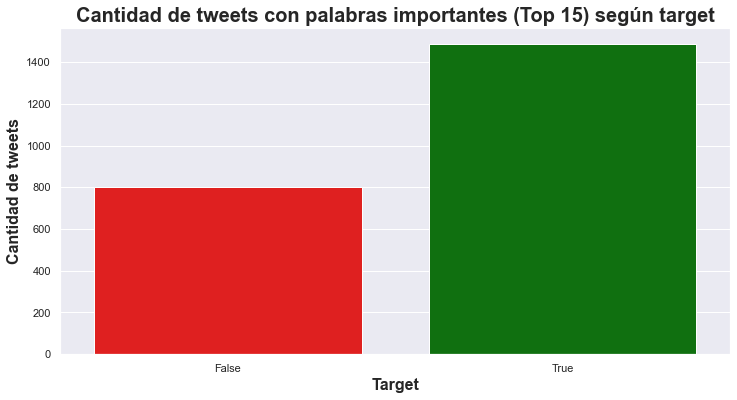

In [64]:
important_words = df['clean_text'].str.split().to_frame().explode('clean_text')['clean_text'].value_counts(ascending=False).head(15)
important_words = important_words.reset_index()['index'].to_list()

def f_aux(tweet):
    for word in important_words:
        if word in tweet:
            return True
    return False

df['important_word_match'] = df['clean_text'].apply(f_aux)
df_aux = df.loc[df['important_word_match']==True]

plt.figure(figsize=(12,6))

ax = sns.countplot(x= 'target',data = df_aux,palette=['red','green']);

plt.title('Cantidad de tweets con palabras importantes (Top 15) según target', fontsize=20,weight='bold')
ax.set_xlabel('Target', fontsize=16, fontweight='bold')
ax.set_ylabel('Cantidad de tweets', fontsize=16, fontweight='bold')

Podemos observar que con el top15 de palabras importantes vemos mayor tendencia a que sea un tweet veraz!

Ahora, de estos registros con match de palabras importantes hay alguna coincidencia con el keyword? si esta vacio se lo podria completar?

## Análisis de ubicacion de tweets según target<a id='link_11'></a>

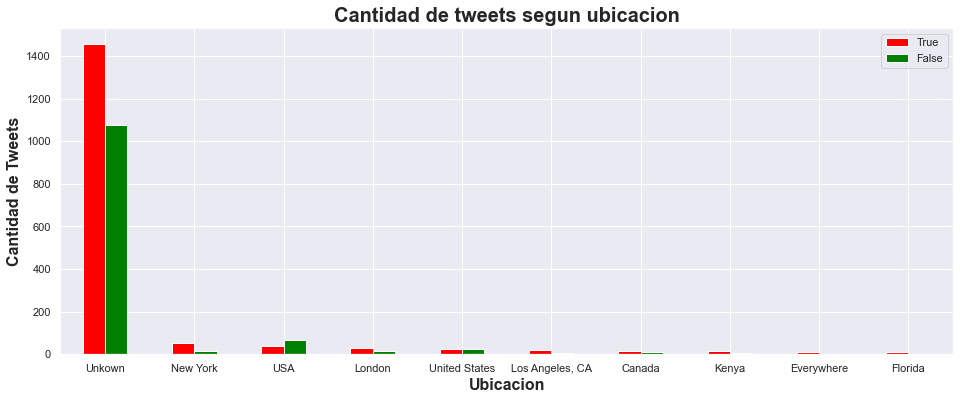

In [65]:
df = train_df
df['location'].fillna('Unkown',inplace=True)
df = df[['location','target','id']].groupby(['location','target']).count().unstack().fillna(0)
df.columns=['True','False']
df.sort_values(by='True',ascending=False,inplace=True)

df.head(10).plot.bar(figsize=(16,6), color=('red','green'));
plt.xticks(rotation=0)
plt.title('Cantidad de tweets segun ubicacion', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold');
plt.xlabel('Ubicacion', fontsize=16,weight='bold');

En el primer analisis de Ubicacion y cantidad de tweets no se tomo en cuenta los NaN..  revisar ese grafico

## Categorización tweet si es terrorista<a id='link_12'></a>

In [66]:
def split_hashtag(word):
    return (len(re.findall(r"(?:bomb|attack|emergency|terrorism|blood|violent|crime|hurt|kill)",word))!=0)

train_df['categ_emergencia'] = train_df['text'].apply(split_hashtag)

In [67]:
df = train_df.loc[train_df['categ_emergencia']==True]

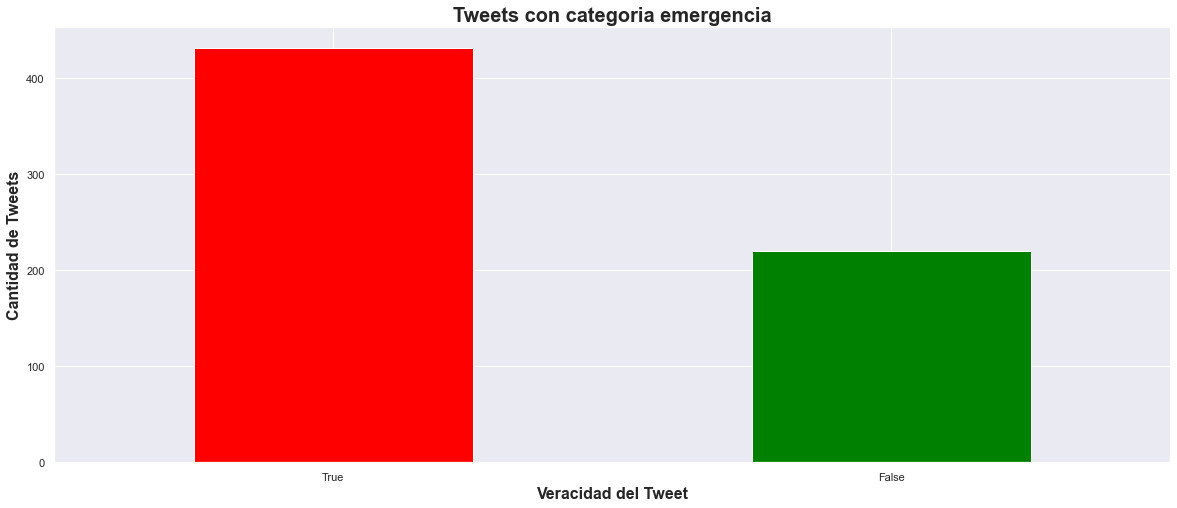

In [68]:
df['target'].value_counts().plot.bar(figsize=(20,8), color=('red','green'));
plt.xticks(rotation=0)
plt.title('Tweets con categoria emergencia', fontsize=20,weight='bold')
plt.ylabel('Cantidad de Tweets', fontsize=16,weight='bold');
plt.xlabel('Veracidad del Tweet', fontsize=16,weight='bold');

No creo que aporte esto lo tengo que revisar

## Análisis de links<a id='link_13'></a>

Veamos si hay alguna relación entre los tweets que tienen links y su veracidad.

In [69]:
train_df['text'].str.contains('http').value_counts()

True     3971
False    3642
Name: text, dtype: int64

Podemos ver que un poco más de la mitad (aproximadamente el **52,2%**) de los tweets tienen links en el texto.

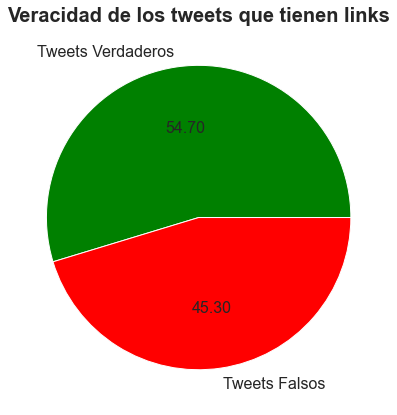

In [70]:
train_df.loc[train_df['text'].str.contains('http')]['target'].value_counts().plot.pie(labels=['Tweets Verdaderos','Tweets Falsos'],\
                                                figsize=(7,7),autopct='%.2f', fontsize=16,colors=('green','red'))

plt.ylabel('');
plt.title('Veracidad de los tweets que tienen links',fontsize=20,weight='bold');

No parece que el hecho de que un tweet tenga un link o no sea determinante para la veracidad del mismo. Vamos a analizar los links que aparecen en los tweets.

In [71]:
import re
def split_links(text):
    return re.findall(r"(http[^ ]+)",text)

train_df['links'] = train_df['text'].apply(split_links)

In [72]:
links_df = train_df[['links','target']].explode('links').dropna()
links_df.head()

,links,target
31,http://t.co/lHYXEOHY6C,True
32,http://t.co/YAo1e0xngw,False
33,http://t.co/2nndBGwyEi,True
35,http://t.co/qqsmshaJ3N,False
37,http://t.co/3ImaomknnA,True


In [73]:
links_df.groupby(['links','target']).agg({'target':'count'}).rename(columns={'target':'cant_target'}).reset_index().nlargest(20,'cant_target')

,links,target,cant_target
3565,http://t.co/qew4c5M1xd,False,9
1396,http://t.co/KSAwlYuX02,True,6
2706,http://t.co/eNCmhz6y34,False,5
3525,http://t.co/q2eBlOKeVE,False,5
3907,http://t.co/vVPLFQv58P,True,5
1499,http://t.co/LvlH3W3aWO\n#Antioch\n\nhttp://t.c...,True,4
2235,http://t.co/WvJ39a3BGM,False,4
3365,http://t.co/nnMQlz91o9,False,4
3389,http://t.co/o91f3cYy0R,False,4
3784,http://t.co/thoYhrHkfJ,False,4
